In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
from scipy import stats


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
# import matplotlib.pyplot as plt
# from numba import njit



In [2]:
def average_in_ranges(X, Y, step):
    # Create bins based on the specified step size
    min_x = np.min(X)
    max_x = np.max(X)
    bins = np.arange(min_x, max_x+step, step)
    
    # Initialize a list to store averages
    averages = []
    stds = []
    
    # Iterate through the bins to calculate averages
    for i in range(len(bins) - 1):
        mask = (X >= bins[i]) & (X < bins[i + 1])
        if np.any(mask):
            avg = np.mean(Y[mask])
            std = np.std(Y[mask])
        else:
            avg = 0  # or you can use 0 or np.nan if you prefer
        averages.append(avg)
        stds.append(std)
        
        
    
    return bins, averages,stds

On this notebook, we analyse more in depth the claim that the speed increases as it approaches the apoptotic cell.


Video 1 

In [221]:
AC_video1_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1_v2.csv' )
ids_AC_video1 = AC_video1_dataframe['Track ID'].unique()
AC_positions = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1//AC_positions_video1.csv')
AC_names =AC_positions[['label']].values
AC_names = AC_names[:,0]
AC_video1_dataframe = AC_video1_dataframe.drop(columns=['Unnamed: 0'])
AC_video1_dataframe = AC_video1_dataframe.dropna()
# AC_video1_dataframe[AC_video1_dataframe['Classification']=='Before_Contact']['Track ID'].unique()

In [166]:
speeds_video1 = [] 
distances_video1 = []
for i,id in enumerate(ids_AC_video1):
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    # status = traj[traj['Frame']==0]['Classification'].values[0]
    
    # if status == 'Back':
    #     continue
    # elif status == 'After_Contact':
    #     continue
    # else:
   
    # print(f'id {id}')
  
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    speeds_video1.append(speed)
    if np.max(speed) > 0.6:
        print(f'big speed = {speed.max():.3f} id {id}')
    
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for name in AC_names:
            x_AC = AC_positions[AC_positions['label']==name]['x (micron)'].values[0]
            y_AC = AC_positions[AC_positions['label']==name]['y (micron)'].values[0]
            dist = np.sqrt((x_AC-X[t])**2+(y_AC-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
        # with open(f'data/apoptotic_cells/bigger_videos/video_1/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
        #     kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
    distances_video1.append(min_dist)
        
flat_distances_video1 = np.hstack(distances_video1)
flat_speeds_video1 = np.hstack(speeds_video1) 

big speed = 1.511 id 0
big speed = 0.628 id 6
big speed = 2.833 id 8
big speed = 0.693 id 9
big speed = 0.682 id 10
big speed = 0.680 id 11
big speed = 0.639 id 12
big speed = 0.764 id 14
big speed = 0.878 id 20
big speed = 0.648 id 22
big speed = 0.877 id 23
big speed = 0.621 id 24
big speed = 0.724 id 28


In [158]:
traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == 8].sort_values('Frame')
status = traj[traj['Frame']==1]['Classification'].values[0]
traj[traj['Classification']=='After_Contact']['speed'].max()

2.8331993163431943

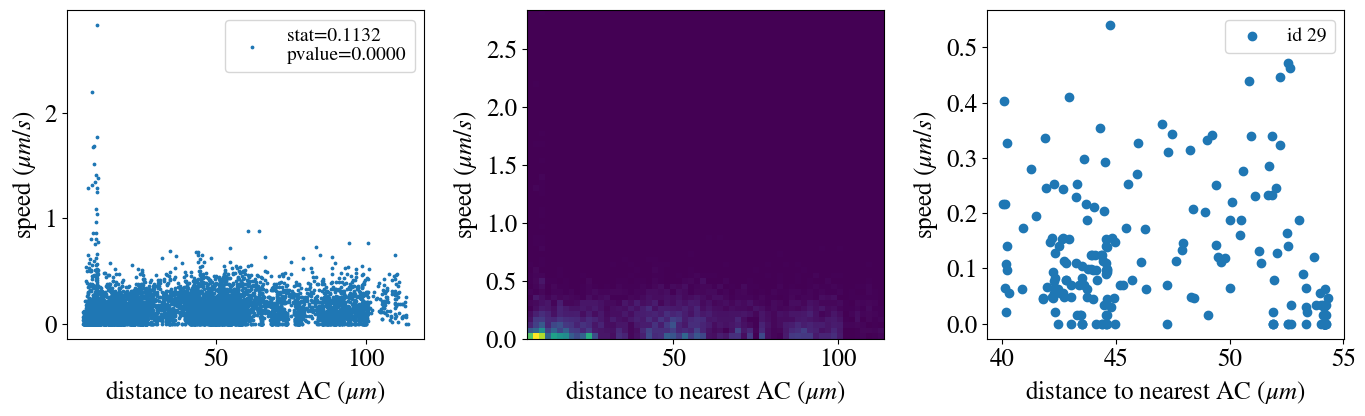

In [145]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances = flat_distances_video1
flat_speeds=flat_speeds_video1
distances,speeds = distances_video1,speeds_video1
x = flat_distances
y = flat_speeds
H, xedges, yedges = np.histogram2d(x, y, bins=60)
H = H.T
res = stats.pearsonr(flat_distances,flat_speeds)
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(distances[28],speeds[28], label =f'id {ids_AC_video1[28]}')

for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()

for b in [0,2]:
    ax[b].legend(fontsize=14)
    
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




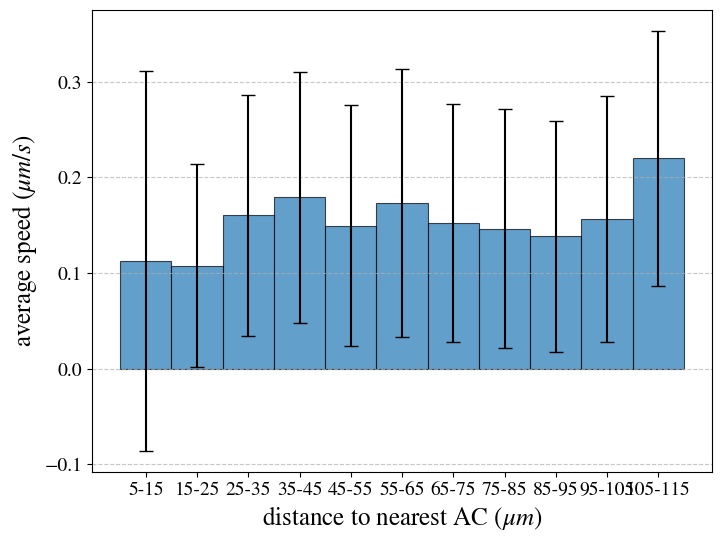

In [98]:
X = flat_distances
Y = flat_speeds
step_size = 10  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages, yerr=std,width=step_size, capsize=5,lw=0.8,align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

Video 2

In [162]:

AC_video2_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2_v2.csv')
ids_AC_video2 = AC_video2_dataframe['Track ID'].unique()
ACs_pos_DF = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2.csv',usecols=['X','Y'])
AC_positions = ACs_pos_DF.values
# AC_positions.shape
AC_names = ['A','B','C','D','E','F','G','H','I','J','K','L', 'M']
ids_that_touched_AC = [30,34,2,3,20,9,5,15,13,10,1,6]
AC_video2_dataframe = AC_video2_dataframe.drop(columns=['Unnamed: 0'])
AC_video2_dataframe = AC_video2_dataframe.dropna()
AC_video2_dataframe

,spot ID,Track ID,x (micron),y (micron),T (sec),Frame,Classification,squared displacement,vx,vy,speed
1,3033,0,120.681022,99.049518,3.346569,1,Before_Contact,0.053561,-0.031035,-0.062069,0.069395
2,3037,0,120.784522,99.153018,6.693138,2,Before_Contact,0.010712,0.031035,0.031034,0.043889
3,3042,0,120.370522,99.153018,10.039707,3,Before_Contact,0.182108,-0.124138,0.000000,0.124138
4,3045,0,120.474022,99.049518,13.386276,4,Before_Contact,0.139259,0.031034,-0.031034,0.043889
5,3048,0,120.370522,99.256518,16.732845,5,Before_Contact,0.171396,-0.031034,0.062069,0.069395
...,...,...,...,...,...,...,...,...,...,...,...
6055,148879,34,149.385027,52.819510,659.274078,197,Back,455.107129,0.082759,0.010345,0.083403
6056,148882,34,149.385027,52.716010,662.620647,198,Back,458.785003,0.000000,-0.031034,0.031034
6057,148885,34,149.730027,52.819510,665.967215,199,Back,463.426981,0.103448,0.031034,0.108003
6058,148888,34,149.730027,52.819510,669.313784,200,Back,463.426981,0.000000,0.000000,0.000000


In [176]:

speeds_video2 = [] 
distances_video2 = []
for i,id in enumerate(ids_AC_video2):
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')
    # status = traj[traj['Frame']==0]['Classification'].values[0]
    
    # if status == 'Back':
    #     print(f'id back {id}')
    #     X = traj.values[:,2]
    #     Y = traj.values[:,3]
    #     time = traj.values[:,4]
    # elif status == 'After_Contact':
    #     print(f'id always touch {id}')
    #     continue
    # else:
    # print(f'id {id}')
    # traj = traj[traj['Classification']=='Before_Contact']
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    speeds_video2.append(speed)
    if np.max(speed) >1:
        print(f'big speed = {speed.max():.3f} id {id}')
        status = traj[traj['Frame']==199]['Classification'].values[0]
        print(status)
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)

        min_dist.append(distante_to_nearestAC)
        # with open(f'data/apoptotic_cells/bigger_videos/video_2/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
        #     kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
    distances_video2.append(min_dist)
    
flat_distances_video2 = np.hstack(distances_video2)
flat_speeds_video2 = np.hstack(speeds_video2) 

big speed = 1.019 id 3
After_Contact
big speed = 1.196 id 13
After_Contact
big speed = 1.122 id 34
Back


In [173]:
traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == 13].sort_values('Frame')
status = traj[traj['Frame']==1]['Classification'].values[0]
# traj[traj['Classification']=='After_Contact']['speed'].max()
traj

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
2425,15907,13,82.334265,52.474510,3.343005,1,Before_Contact,0.013390,0.015517,-0.031034,0.034698
2426,15910,13,82.334265,52.474510,6.686010,2,Before_Contact,0.013390,0.000000,0.000000,0.000000
2427,15913,13,82.541265,52.578010,10.029015,3,Before_Contact,0.066952,0.062069,0.031034,0.069395
2428,15916,13,82.903515,52.733260,13.372020,4,Before_Contact,0.409744,0.108621,0.046552,0.118176
2429,15919,13,83.214015,53.043760,16.715025,5,Before_Contact,1.084616,0.093103,0.093103,0.131668
...,...,...,...,...,...,...,...,...,...,...,...
2621,16507,13,80.937015,90.252016,658.571987,197,Before_Contact,1421.141161,0.015517,0.077586,0.079123
2622,16510,13,80.937015,90.252016,661.914993,198,Before_Contact,1421.141161,0.000000,0.000000,0.000000
2623,16513,13,81.247515,90.666016,665.257997,199,Before_Contact,1451.767494,0.093103,0.124138,0.155172
2624,16516,13,81.299265,90.873016,668.601003,200,Before_Contact,1467.474337,0.015517,0.062069,0.063979


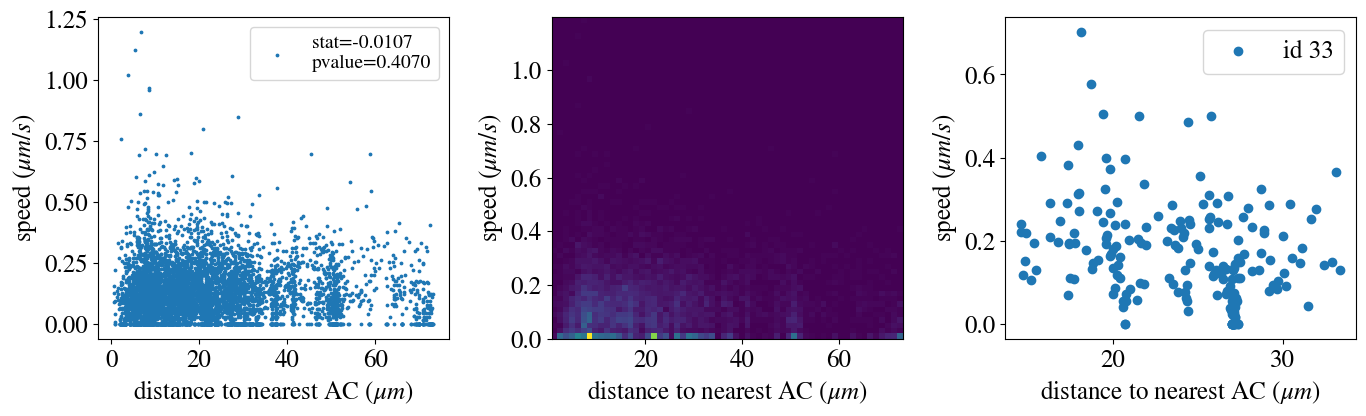

In [167]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
speeds,distances = speeds_video2,distances_video2
flat_distances,flat_speeds = flat_distances_video2,flat_speeds_video2
x = flat_distances_video2
y = flat_speeds_video2
H, xedges, yedges = np.histogram2d(x, y, bins=60)
H = H.T
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
res = stats.pearsonr(flat_distances,flat_speeds)

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(distances[28],speeds[28], label =f'id {ids_AC_video2[28]}')


for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()

ax[2].legend()
ax[0].legend(fontsize=14)
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_2/video2_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




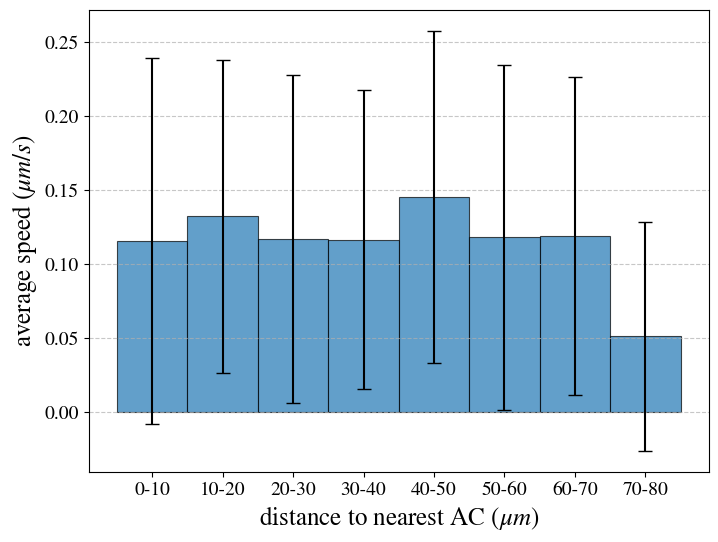

In [168]:
X = flat_distances_video2
Y = flat_speeds_video2
step_size = 10  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages,width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig('data/apoptotic_cells/bigger_videos/video_2/video2_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

Video 5

In [178]:
video=5
AC_video5_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/AC_positions_video5_v2.csv')
ids_AC_video5 = AC_video5_dataframe['Track ID'].unique()
AC_positions = np.loadtxt('data/apoptotic_cells/bigger_videos/video_5/AC_positions.dat')
AC_video5_dataframe = AC_video5_dataframe.dropna()
AC_video5_dataframe = AC_video5_dataframe.drop(columns=['Unnamed: 0'])
AC_video5_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2050,0,70.690513,40.882507,3.348253,1,After_Contact,0.005356,0.015517,-0.015517,0.021945
2,2053,0,70.690513,40.882507,6.696506,2,After_Contact,0.005356,0.000000,0.000000,0.000000
3,2056,0,70.690513,40.986007,10.044759,3,After_Contact,0.005356,0.000000,0.031034,0.031034
4,2059,0,70.690513,40.986007,13.393013,4,After_Contact,0.005356,0.000000,0.000000,0.000000
5,2062,0,70.690513,40.986007,16.741266,5,After_Contact,0.005356,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6203,73762,30,116.230521,39.123007,656.257614,196,Before_Contact,277.715182,0.010345,-0.010345,0.014630
6204,73765,30,116.368521,39.261007,659.605867,197,Before_Contact,271.554445,0.041379,0.041379,0.058519
6205,73768,30,116.023521,39.364507,662.954120,198,Before_Contact,273.838536,-0.103448,0.031034,0.108003
6206,73771,30,115.920021,39.433507,666.302373,199,Before_Contact,273.473128,-0.031034,0.020690,0.037299


In [181]:

speeds_video5 = [] 
distances_video5 = []
for i,id in enumerate(ids_AC_video5):
    traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')

    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    speeds_video5.append(speed)    
    if np.max(speed) >0.65:
        print(f'big speed = {speed.max():.3f} id {id}')
        status = traj[traj['Frame']==199]['Classification'].values[0]
        print(status)
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
    distances_video5.append(min_dist)
    
flat_distances_video5 = np.hstack(distances_video5)
flat_speeds_video5 = np.hstack(speeds_video5)

big speed = 1.107 id 1
After_Contact
big speed = 0.982 id 2
After_Contact
big speed = 0.889 id 5
After_Contact
big speed = 0.759 id 7
After_Contact
big speed = 0.970 id 9
Before_Contact
big speed = 0.735 id 12
After_Contact
big speed = 0.783 id 13
After_Contact
big speed = 0.712 id 15
Before_Contact
big speed = 0.759 id 17
Back
big speed = 0.723 id 20
Back
big speed = 0.655 id 22
Back
big speed = 0.706 id 25
Back


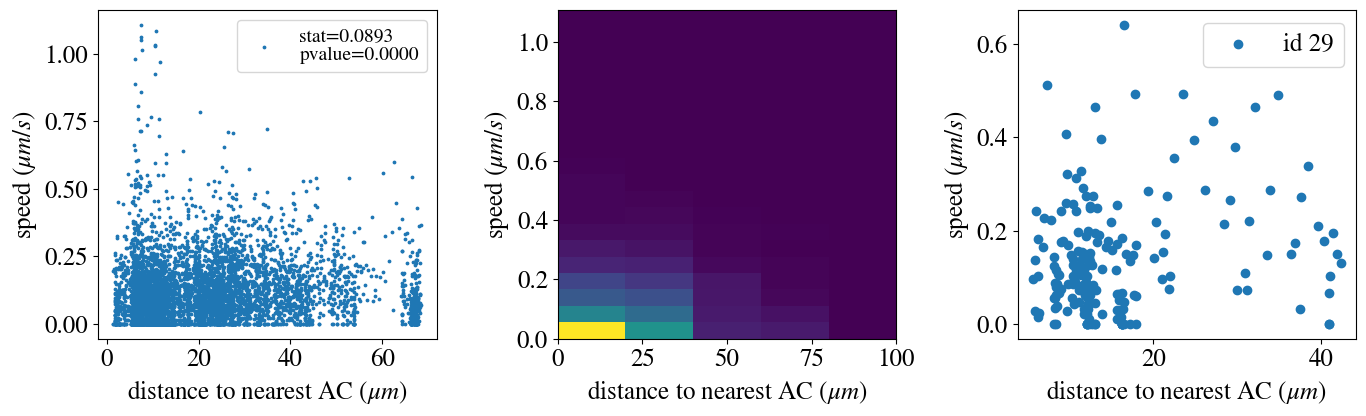

In [180]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances,flat_speeds = flat_distances_video5,flat_speeds_video5
distances,speeds = distances_video5,speeds_video5
x = flat_distances_video5
y = flat_speeds_video5
H, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(0,120,20),20])
H = H.T
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
res = stats.pearsonr(flat_distances_video5,flat_speeds_video5)

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(distances[29],speeds[29], label =f'id {ids_AC_video5[29]}')



for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()
    # a.set_ylim((0,0.5))

ax[2].legend()
ax[0].legend(fontsize=14)
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




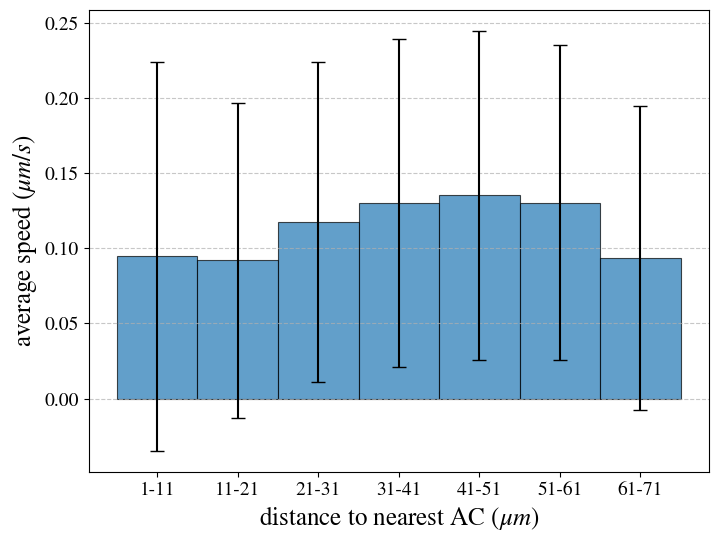

In [182]:
X = flat_distances
Y = flat_speeds
step_size = 10  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

Joining all videos 


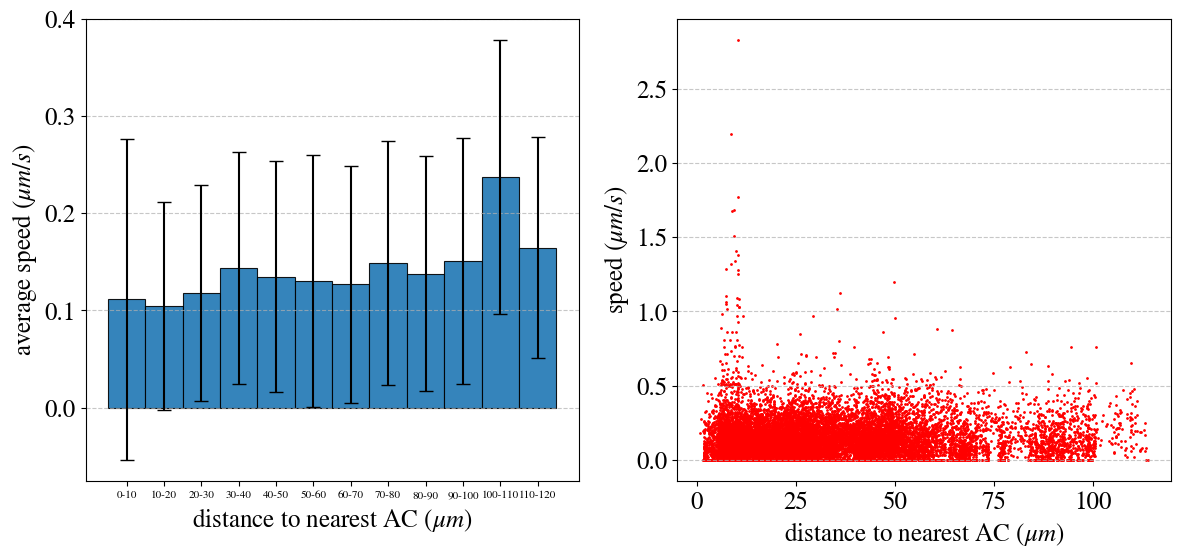

In [217]:
distances_all = np.hstack((flat_distances_video1,flat_distances_video2,flat_distances_video5))
speeds_all = np.hstack((flat_speeds_video1,flat_speeds_video2,flat_speeds_video5))
step_size = 10
bins, averages,std = average_in_ranges(distances_all, speeds_all, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(1,2,figsize =(14,6))
# ax.plot(distances_all,speeds_all,color='red',lw=0.6,alpha=0.1)
# ax.scatter(distances_all,speeds_all,color='red',s=1,alpha=0.1)
ax[0].bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9)
ax[1].scatter(distances_all,speeds_all,color='red',s=1)
ax[0].set_xticks(midpoints, range_labels)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].set_ylabel(r'average speed ($\mu m/s$)')
ax[1].set_ylabel(r'speed ($\mu m/s$)')
for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    


    # Show bin edges on x-axis
    a.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

# With ghost cells 

In [3]:
import pims
def diag(video):
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    Lx=frames.shape[2]
    Ly=frames.shape[1]
    if video == 2:
        ydiag = -np.arange(Lx)+Ly
        m = -1
        b = Ly
    if video == 3:
        ydiag = 1.7*np.arange(Lx)
        m = 1.7
        b = 0.0
    if video == 4:
        ydiag = np.arange(Lx)
        m = 1
        b = 0.0
    return ydiag,m,b

In [4]:
# diag_array,m,b = diag(video,x_max_px,y_max_px)

# Function to check if a point is below the line
def is_below_line(video,x, y,m,b):
    if video == 3:
        return y > m * x + b
    else:
        return y < m*x + b

# Generate a random point below the line
def generate_random_point(video,width, height,m,b):
    while True:
        x_rand = np.random.uniform(0, width)
        y_rand = np.random.uniform(0, height)
        if is_below_line(video,x_rand, y_rand,m,b):
            return x_rand, y_rand
        


In [5]:
def average_in_ranges(X, Y, step):
    # Create bins based on the specified step size
    min_x = np.min(X)
    max_x = np.max(X)
    bins = np.arange(min_x, max_x+step, step)
    
    # Initialize a list to store averages
    averages = []
    stds = []
    
    # Iterate through the bins to calculate averages
    for i in range(len(bins) - 1):
        mask = (X >= bins[i]) & (X < bins[i + 1])
        if np.any(mask):
            avg = np.mean(Y[mask])
            std = np.std(Y[mask])
        else:
            avg = 0  # or you can use 0 or np.nan if you prefer
        averages.append(avg)
        stds.append(std)
        
        
    
    return bins, averages,stds

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


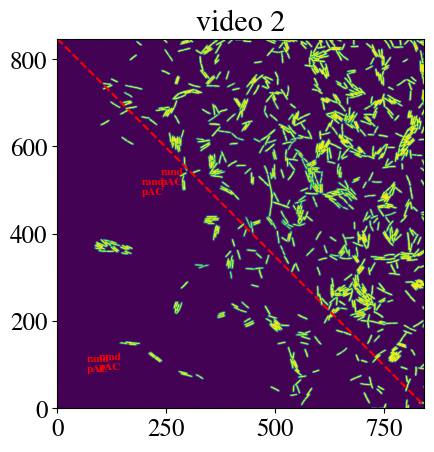

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


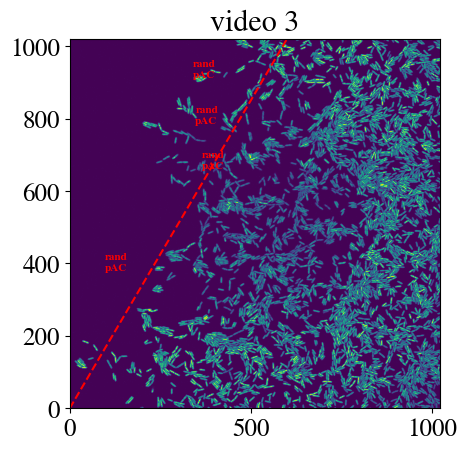

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


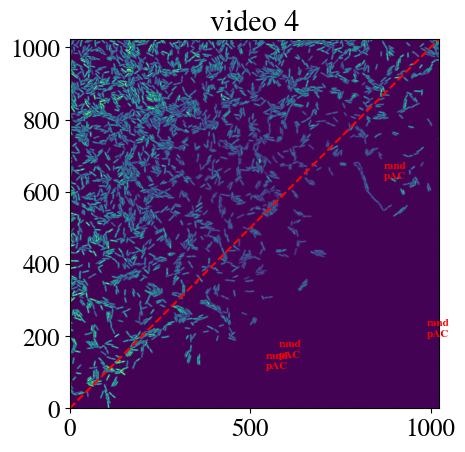

In [6]:

for video in [2,3,4]:

    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    # plt.imshow(frames_cells[0],cmap='inferno',alpha=1)
    # plt.imshow(frames_bacs[0],alpha=0.5)
    ppm=4.8309
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]


    plt.imshow(frames[0],origin='lower')
    Lx_array = np.arange(x_max_px)
    # video=3
    diag_array,m,b = diag(video)
    pos_random_ACs = []
    for i in range(4):
        x_point, y_point = generate_random_point(video,x_max_px,y_max_px,m,b)
            
        pos_random_ACs.append([x_point,y_point])

    for pos in pos_random_ACs:
        plt.annotate('rand\npAC',xy=(pos[0],pos[1]),color='red',weight='bold',size=8)

    # plt.scatter(x_point,y_point, color='red')
        
    plt.plot(np.arange(x_max_px),diag_array,color='red', ls='--' )
    plt.title(f'video {video}')
    # plt.fill_between(Lx_array,diag_array,color='red',alpha=0.5)

    plt.xlim((0,x_max_px))
    plt.ylim((0,y_max_px))
    plt.show()

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


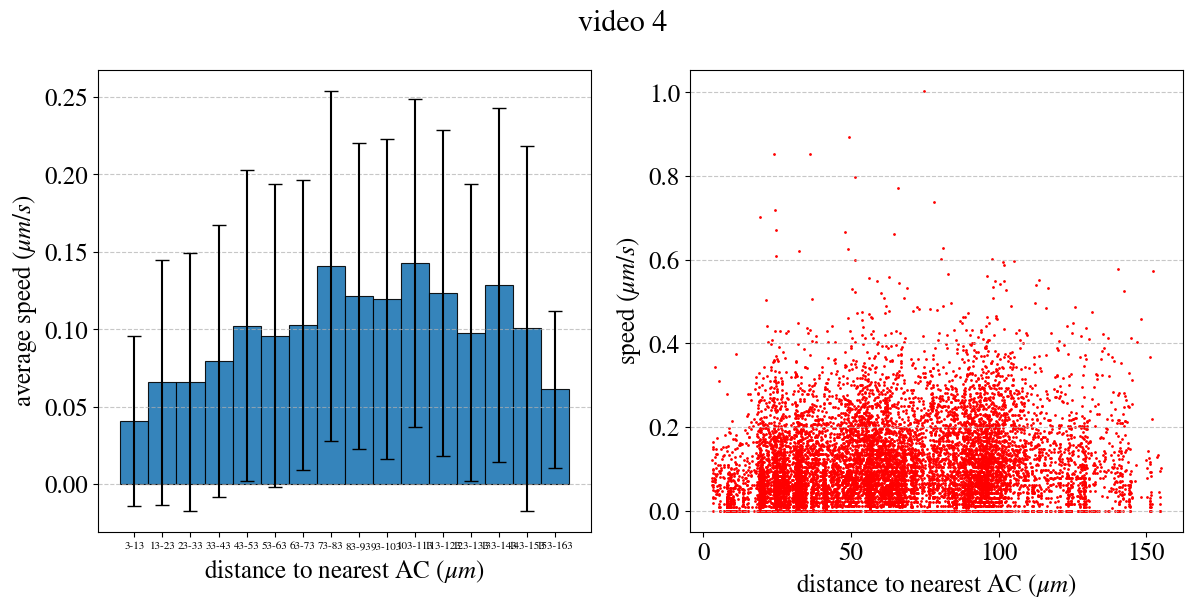

In [18]:
# video=4

# frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
# # plt.imshow(frames_cells[0],cmap='inferno',alpha=1)
# # plt.imshow(frames_bacs[0],alpha=0.5)
# ppm=4.8309
# x_max_px=frames.shape[2]
# y_max_px=frames.shape[1]
# dataframe = pd.read_csv(f'data/new-videos/video{video}/video{video}_classif.csv')
# diag_array,m,b = diag(video)
# ids = dataframe['Track ID'].unique()

import statsmodels.api as sm

def generate_one_conf(video,ACnumber):
    pos_random_ACs = []
    for i in range(ACnumber):
        x_point, y_point = generate_random_point(video,x_max_px,y_max_px,m,b)
            
        pos_random_ACs.append([x_point,y_point])

    pos_random_ACs = np.array(pos_random_ACs)/ppm
    
    distances = []
    speeds = []
    for id in ids:
        
        traj = np.loadtxt(f'data/new-videos/video{video}/time_x_y/time_x_y_id_{id}.dat')
        speed = np.loadtxt(f'data/new-videos/video{video}/velocities/mag_v_time_bact_id_{id}.dat',usecols=1)
        time = traj[:,0][1:]
        x = traj[:,1][1:]
        y = traj[:,2][1:]
        speeds.append(speed)
            # print(time)
 
            
            
            # file_xy = np.loadtxt(f'/media/janne/Transcend/bacteria/apoptotic_cells/time_x_y/time_x_y_id_{id}.dat') #time x y 
        

        min_dist_list = []
        for t in range(len(time)):
            dist_at_time_t=[]
            for cell in pos_random_ACs:
                
                dist_to_cell = np.sqrt((cell[0] - x[t])**2 + (cell[1] - y[t])**2)
                dist_at_time_t.append(dist_to_cell)
                
                
            min_dist_to_apoptotic = min(dist_at_time_t)
            min_dist_list.append(min_dist_to_apoptotic)
        distances.append(min_dist_list)
        
            # with open(file_name_min, 'a') as kk:

            #     kk.write(f'{time[t]} {min_dist_to_apoptotic:.3f}\n')
    return distances,speeds

# distances,speeds = generate_one_conf(video,4)
# flat_distances = np.hstack(distances)
# flat_speeds = np.hstack(speeds)
distances_all_pAC, speeds_all_pAC = [],[]
for video in [4]:
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')

    ppm=4.8309
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]
    dataframe = pd.read_csv(f'data/new-videos/video{video}/video{video}_classif.csv')
    diag_array,m,b = diag(video)
    ids = dataframe['Track ID'].unique()
    distances,speeds = generate_one_conf(video,4)
    flat_distances = np.hstack(distances)
    flat_speeds = np.hstack(speeds)
    distances_all_pAC.append(flat_distances)
    speeds_all_pAC.append(flat_speeds)
    
    flat_distances_all_pAC, flat_speeds_all_pAC = np.hstack(distances_all_pAC),np.hstack(speeds_all_pAC)

    step_size = 10
    bins, averages,std = average_in_ranges(flat_distances_all_pAC, flat_speeds_all_pAC, step_size)

    # Plotting the histogram
    range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
    midpoints = bins[:-1] + step_size / 2
    fig,ax = plt.subplots(1,2,figsize =(14,6))
    # ax.plot(distances_all,speeds_all,color='red',lw=0.6,alpha=0.1)
    # ax.scatter(distances_all,speeds_all,color='red',s=1,alpha=0.1)
    ax[0].bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9)
    ax[1].scatter(flat_distances_all_pAC, flat_speeds_all_pAC,color='red',s=1)
    ax[0].set_xticks(midpoints, range_labels)
    ax[0].tick_params(axis='x', labelsize=8)

    ax[0].set_ylabel(r'average speed ($\mu m/s$)')
    ax[1].set_ylabel(r'speed ($\mu m/s$)')
    for a in ax:
        a.set_xlabel(r'distance to nearest AC ($\mu m$)')
        


        # Show bin edges on x-axis
        a.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
    plt.suptitle(f'video {video}')
    plt.show()

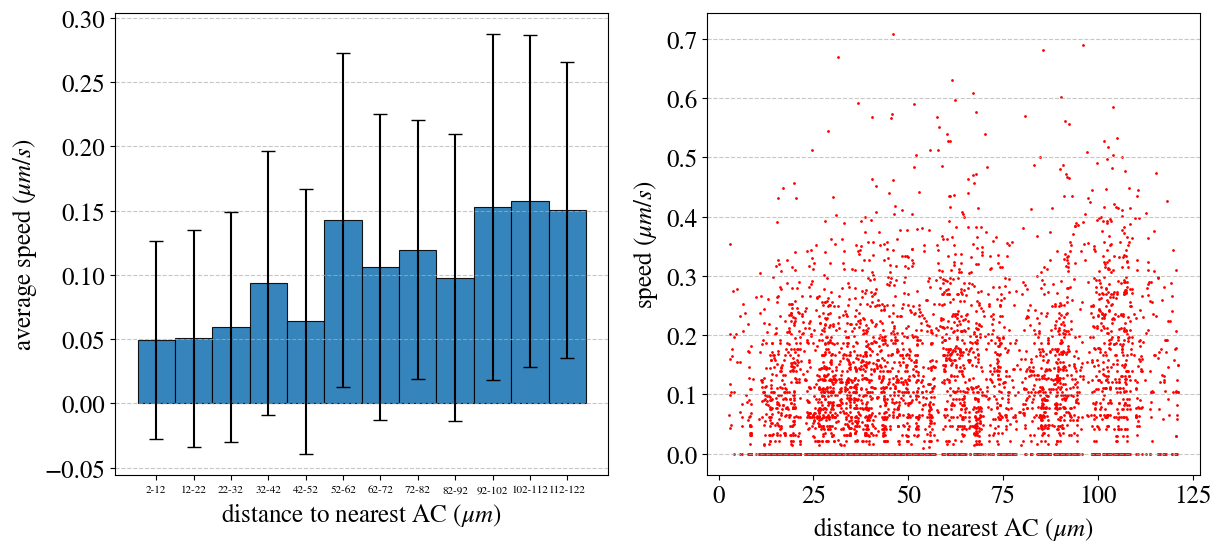

In [ ]:

step_size = 10
bins, averages,std = average_in_ranges(flat_distances_all_pAC, flat_speeds_all_pAC, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(1,2,figsize =(14,6))
# ax.plot(distances_all,speeds_all,color='red',lw=0.6,alpha=0.1)
# ax.scatter(distances_all,speeds_all,color='red',s=1,alpha=0.1)
ax[0].bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.9)
ax[1].scatter(flat_distances_all_pAC, flat_speeds_all_pAC,color='red',s=1)
ax[0].set_xticks(midpoints, range_labels)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].set_ylabel(r'average speed ($\mu m/s$)')
ax[1].set_ylabel(r'speed ($\mu m/s$)')
for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    


    # Show bin edges on x-axis
    a.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()

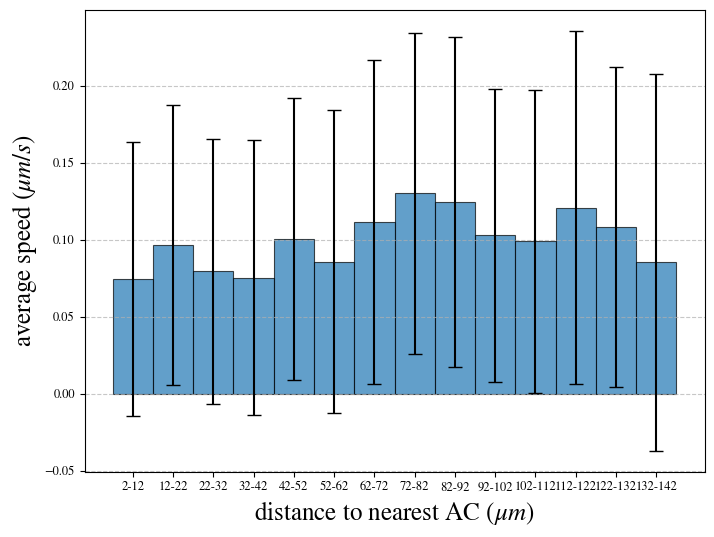

In [125]:
X = flat_distances
Y = flat_speeds
step_size = 10  # Adjust the step size as needed

bins, averages,std = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages, width=step_size, yerr=std,capsize=5,lw=0.8, align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=9)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'data/new-videos/video{video}/speed_vs_distance/video{video}_speeds_vs_distance_to_pAC_avgs_bar_plot_wstd.pdf',dpi=200,bbox_inches="tight")
plt.show()